In [19]:
library(ggplot2)

In [1]:
outdir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/"

In [2]:
list.files(outdir)

[1] "?"                                                                        
 [2] "covariates.tsv"                                                           
 [3] "D52_DA_untreated_eQTL_snakemake.py"                                       
 [4] "D52_DA_untreated_eQTL_summary_stats_0permutations_1MB_window_snakemake.py"
 [5] "DA_D52_NONE_ss.e"                                                         
 [6] "DA_D52_NONE_ss.o"                                                         
 [7] "DA_D52_NONE.e"                                                            
 [8] "DA_D52_NONE.o"                                                            
 [9] "extra_runs_addressing_reviews"                                            
[10] "extra_runs_addressing_reviews2"                                           
[11] "extra_runs_addressing_reviews3"                                           
[12] "extra_runs_addressing_reviews4"                                           
[13] "extra_runs_addressing_reviews5"                                           
[14] "extra_runs_addressing_reviews6"                                           
[15] "nk_DA_D52_NONE.e"                                                         
[16] "nk_DA_D52_NONE.o"                                                         
[17] "no_kinship_D52_DA_untreated_eQTL_snakemake.py"                            
[18] "no_kinship_results"                                                       
[19] "no_kinship_results_archive_20200919"                                      
[20] "noise_matrix.tsv"                                                         
[21] "phenotypes.tsv"                                                           
[22] "results"                                                                  
[23] "results_archive_20200904"                                                 
[24] "results_ss"                                                               
[25] "samplemapping.tsv"

In [5]:
file = paste0(outdir,"phenotypes.tsv")
df = read.csv(file, sep = "\t", row.names=1)

In [6]:
head(df)

,HPSI0114i.bezi_3,HPSI0114i.eipl_1,HPSI0114i.fikt_3,HPSI0114i.kolf_2,HPSI0114i.lexy_2,HPSI0114i.posc_1,HPSI0114i.rozh_4,HPSI0114i.vass_1,HPSI0114i.wegi_1,HPSI0114i.zapk_2,...,HPSI1113i.hayt_3,HPSI1113i.ieki_3,HPSI1113i.podx_1,HPSI1113i.qolg_1,HPSI1113i.qorq_1,HPSI1113i.vuud_2,HPSI1114i.kuul_1,HPSI1114i.ualf_6,HPSI1114i.zuuy_4,HPSI1213i.hehd_1
ENSG00000261657,0.19980086,0.17044125,0.13595669,0.21083756,0.149776787,0.07455917,0.24776797,0.17801136,0.166892022,0.17229497,...,0.15224272,0.20072062,0.13290532,0.16675195,0.18057172,0.15808788,0.167752370,0.24546738,0.09018739,0.21874736
ENSG00000227640,0.00000000,0.02013723,0.00000000,0.01023038,0.059801035,0.00000000,0.05313009,0.05076713,0.008979948,0.01373522,...,0.02132477,0.00000000,0.01236245,0.02893848,0.09683002,0.01886671,0.006268752,0.00000000,0.00000000,0.03159874
ENSG00000247400,0.13155571,0.12153024,0.34027490,0.12252386,0.110461019,0.06259543,0.09191290,0.11787530,0.103464387,0.10843695,...,0.12499138,0.06293269,0.14515443,0.09508063,0.07425246,0.16673514,0.121456750,0.24519655,0.21014157,0.16182335
ENSG00000228889,0.01946549,0.04781480,0.06836842,0.02597529,0.016656876,0.02603807,0.01151966,0.03578114,0.029522307,0.02461899,...,0.02908869,0.00000000,0.03590612,0.03633439,0.02302583,0.02346048,0.040312283,0.04115412,0.03446586,0.04390728
ENSG00000261125,0.06904194,0.05243875,0.03331874,0.04637568,0.007903986,0.08318554,0.06610981,0.07032384,0.053493500,0.03635422,...,0.06371209,0.00000000,0.07882933,0.03238090,0.02837872,0.05944359,0.040417269,0.10627919,0.02547172,0.05866497
ENSG00000272143,0.05685320,0.05652067,0.10925615,0.04276120,0.047725666,0.02982677,0.04381480,0.04449980,0.058215577,0.03866507,...,0.03133532,0.00000000,0.04588368,0.04396321,0.07609140,0.04167617,0.044229083,0.00000000,0.07186913,0.04726748


In [12]:
pca = prcomp(t(df))
head(pca$x)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175
HPSI0114i.bezi_3,-0.86408136,-4.3615592,1.0140034,-0.5554229,2.8582349,-1.9929280,2.3758202,-1.7082154,1.2396856,-1.4292967,...,-0.016107809,6.895383e-03,0.045291944,-0.016273257,0.0106765133,0.011924956,-0.010798703,0.03649817,-0.016911334,-2.766017e-15
HPSI0114i.eipl_1,1.55182176,1.5423131,-0.3813373,-2.8372367,0.6405576,2.2180367,-0.1144927,-1.6501392,-1.1478160,-0.7262184,...,-0.061810677,3.705031e-05,0.047431023,-0.052456102,0.1207104543,0.007169340,-0.004473247,0.01862602,-0.070637242,-2.773823e-15
HPSI0114i.fikt_3,4.70157760,3.2183940,-6.9653799,1.1581376,-2.9117351,-3.4554230,-6.7356961,-5.9635871,3.7392542,-1.4740503,...,0.007000702,1.603528e-02,-0.020603291,-0.001323568,0.0042875619,-0.017146431,0.011672868,0.01348029,-0.012095741,-2.839742e-15
HPSI0114i.kolf_2,1.44651044,-4.1859306,-0.2489477,-0.6072906,-0.3416710,0.5930333,-1.9382052,0.3381115,-0.1654906,-0.5329726,...,0.013980982,3.252934e-01,0.046344272,0.272786740,-0.1427875180,-0.214788848,-0.116711937,-0.02222153,-0.064331131,-2.741730e-15
HPSI0114i.lexy_2,1.86973868,-0.2814033,-0.2536161,1.1287278,3.5555041,-2.8010052,0.7925055,0.1069611,-1.0569731,-0.5316028,...,-0.041465522,7.082568e-02,-0.010647467,0.022981833,0.0009591244,0.002826766,0.059570087,0.02409145,0.024869786,-2.726985e-15
HPSI0114i.posc_1,0.01501786,-2.4750411,1.1738453,-1.2216348,2.9696968,-3.1370062,2.0999357,-1.1784211,2.0903777,1.5038107,...,-0.004903417,5.531308e-03,-0.001167482,-0.032321295,-0.0145360606,0.014646530,0.011151526,0.03007926,-0.005877433,-2.312386e-15


In [28]:
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.9374 2.9151 2.36077 2.07806 1.91811 1.80101 1.55048
Proportion of Variance 0.1872 0.1026 0.06729 0.05214 0.04442 0.03916 0.02903
Cumulative Proportion  0.1872 0.2898 0.35709 0.40923 0.45365 0.49282 0.52184
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     1.50152 1.40335 1.31453 1.20509 1.08776 1.03401 0.9802
Proportion of Variance 0.02722 0.02378 0.02086 0.01753 0.01429 0.01291 0.0116
Cumulative Proportion  0.54906 0.57284 0.59371 0.61124 0.62553 0.63844 0.6500
                          PC15    PC16   PC17   PC18    PC19    PC20    PC21
Standard deviation     0.96825 0.89108 0.8823 0.8342 0.82597 0.81133 0.80317
Proportion of Variance 0.01132 0.00959 0.0094 0.0084 0.00824 0.00795 0.00779
Cumulative Proportion  0.66136 0.67095 0.6804 0.6887 0.69699 0.70493 0.71272
                          PC22    PC23    PC24

In [26]:
N = 140
df0 = data.frame(PCs = 1:N,
                 cumpro = summary(pca)$importance[3,1:N])
head(df0)

,PCs,cumpro
PC1,1,0.18719
PC2,2,0.28979
PC3,3,0.35709
PC4,4,0.40923
PC5,5,0.45365
PC6,6,0.49282


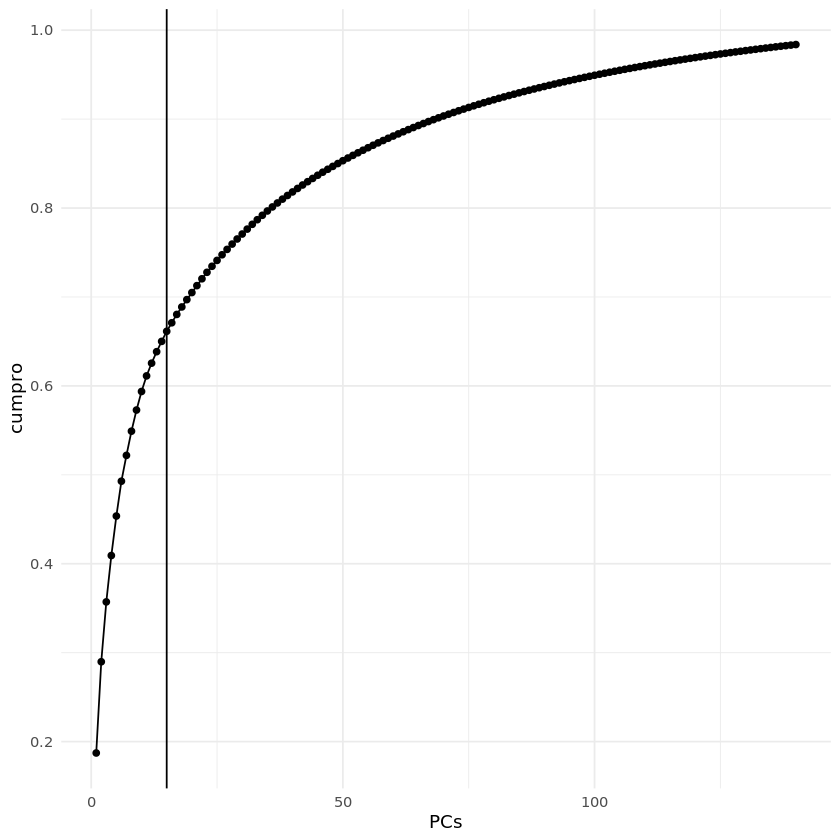

In [29]:
ggplot(df0, aes(x = PCs, y = cumpro)) + geom_point() + geom_line() + theme_minimal() + geom_vline(xintercept = 15)